In [1]:
# importing all the required files
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords , wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer 
from textblob import TextBlob
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('Train_Dataset.csv')
df.head()

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0


In [3]:
df = df[df['headline'] != '']
X = df.drop('is_sarcastic' , axis = 1)
y = df['is_sarcastic']

In [4]:
X.head()

,headline
0,supreme court votes 7-2 to legalize all worldl...
1,hungover man horrified to learn he made dozens...
2,emily's list founder: women are the 'problem s...
3,send your kids back to school with confidence
4,watch: experts talk pesticides and health


In [5]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: is_sarcastic, dtype: int64

## Cleaning and Pre-Processing the given data

In [6]:
# using Lemmatizer 
def pos_tagging(tokens):
    tag_map = {'j': wordnet.ADJ, 'v': wordnet.VERB, 'n': wordnet.NOUN, 'r': wordnet.ADV}
    new_tagged_tokens = [(word, tag_map.get(tag[0].lower(), wordnet.NOUN)) for word, tag in tokens]
    return new_tagged_tokens

def stemming_data(line):
    words = nltk.word_tokenize(line)
    pos_tokens = nltk.pos_tag(words)
    corrected_words = pos_tagging(pos_tokens)
    stem_words = [Lemmatizer.lemmatize(word , tag) for (word , tag) in corrected_words
                 if word not in set(stopwords.words('english'))]
    stem_line = ' '.join(stem_words)
    return stem_line

def clean_data(data):
    for i in range(0 , len(data)):
        cleanData =re.sub('[^a-zA-Z]' , ' ' , data['headline'][i]).lower()
        cleanData = cleanData.split()
        cleanData = ' '.join(cleanData)
        cleanHeadline.append(stemming_data(cleanData))

Lemmatizer = WordNetLemmatizer()
cleanHeadline = []
clean_data(X)

In [7]:
cleanHeadline[:5]

['supreme court vote legalize worldly vice',
 'hungover man horrify learn make dozen plan last night',
 'emily list founder woman problem solver congress',
 'send kid back school confidence',
 'watch expert talk pesticide health']

In [8]:
X['clean Text'] = cleanHeadline
X.head()

,headline,clean Text
0,supreme court votes 7-2 to legalize all worldl...,supreme court vote legalize worldly vice
1,hungover man horrified to learn he made dozens...,hungover man horrify learn make dozen plan las...
2,emily's list founder: women are the 'problem s...,emily list founder woman problem solver congress
3,send your kids back to school with confidence,send kid back school confidence
4,watch: experts talk pesticides and health,watch expert talk pesticide health


## Converting Text to Numbers

In [9]:
# trying to figure out the sentiment of the sentence

sentiment = X['headline'].apply(lambda x:TextBlob(x).sentiment)
X['Polarity'] = [x.polarity for x in sentiment.values]
X['Subjectivity'] = [x.subjectivity for x in sentiment.values]


In [10]:
# converting the clean text into vector format
cv_vector = CountVectorizer(max_features=2500)
cv_value = cv_vector.fit_transform(X['clean Text']).toarray()

In [11]:
cv_col = cv_vector.get_feature_names()

In [12]:
cv_df = pd.DataFrame(cv_value , columns=cv_col)

In [13]:
X_final = pd.concat([X , cv_df] , axis = 1)

In [14]:
X_final.head()

,headline,clean Text,Polarity,Subjectivity,abandon,able,abortion,absolutely,abuse,accept,...,yoga,york,young,youth,youtube,zero,zika,zone,zoo,zuckerberg
0,supreme court votes 7-2 to legalize all worldl...,supreme court vote legalize worldly vice,0.0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hungover man horrified to learn he made dozens...,hungover man horrify learn make dozen plan las...,0.0,0.066667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,emily's list founder: women are the 'problem s...,emily list founder woman problem solver congress,0.0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,send your kids back to school with confidence,send kid back school confidence,0.0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,watch: experts talk pesticides and health,watch expert talk pesticide health,0.0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_final.drop(['headline' , 'clean Text'] , axis = 1 , inplace=True)

In [24]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44262 entries, 0 to 44261
Columns: 2501 entries, Polarity to zuckerberg
dtypes: float64(2), int64(2499)
memory usage: 845.9 MB


In [25]:
# import the models
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# import hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

# import evaluation metrics
from sklearn.metrics import confusion_matrix , classification_report , precision_score , f1_score , recall_score
from sklearn.metrics import plot_roc_curve ,accuracy_score

In [26]:
import numpy as np
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((30983, 2501), (13279, 2501), (30983,), (13279,))

In [31]:
models = {'Logistic Regression' : LogisticRegression() , 
         'KNN' : KNeighborsClassifier() ,
         'Random Forests' : RandomForestClassifier() ,
         'Desicion Tree' : DecisionTreeClassifier()}

# Fitting and checkin score of models
def prep_models(models , X_train , X_test , y_train  , y_test):
    """
        fitting and testing different models 
        models = dict of the required models
    """
    
    # set the random seed
    np.random.seed(45)
    
    #scores dict 
    mod_scores = {}
    
    for name , model in models.items():
        model.fit(X_train , y_train) # fitting the model
        pred = model.predict(X_test)
        # evaluating and adding the scores to the dict
        mod_scores[name] = {'Precision' : precision_score(pred , y_test ) , 
                           'Recall' : recall_score(pred , y_test ) , 
                           'F1 Score' : f1_score(pred , y_test )  , 
                           'Accuracy' : accuracy_score(pred , y_test )}
    return mod_scores

In [32]:
model_scores = prep_models(models , 
                           X_train = X_train ,
                           X_test = X_test , 
                          y_train = y_train , 
                          y_test = y_test)
model_display = pd.DataFrame(model_scores)
model_display

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Logistic Regression,KNN,Random Forests,Desicion Tree
Precision,0.741396,0.586851,0.842695,0.829221
Recall,0.800245,0.678364,0.885987,0.842626
F1 Score,0.769697,0.629298,0.863799,0.835870
Accuracy,0.794186,0.679268,0.876723,0.848934


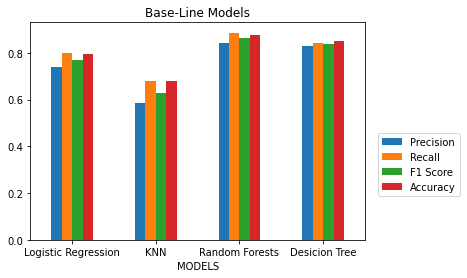

In [33]:
import matplotlib.pyplot as plt
model_display.T.plot(kind = 'bar')
plt.title('Base-Line Models')
plt.legend(loc=(1.04 , 0.2))
plt.xlabel("MODELS")
plt.xticks(rotation = 0);

## We found the best model to be Random Forest Classifier with an accuracy of 0.87 

In [34]:
np.random.seed(45)
clf = RandomForestClassifier()
clf.fit(X_train , y_train)
predictions = clf.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [37]:
submission = pd.DataFrame({'prediction':predictions})

#Visualize the first 5 rows
submission.head()

,prediction
0,0
1,1
2,0
3,1
4,0
5,0
6,1
7,0
8,0
9,0


In [39]:
filename = 'Submission DPhi.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Submission DPhi.csv
